In [1]:
import re
import string
from time import time 

import torch
import torch.nn as nn
from torchsummary import summary

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [2]:
nltk.download('stopwords')
punct = string.punctuation
stopwords_english = stopwords.words('english')
stemmer = PorterStemmer()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataset = pd.read_csv('imdb_complete.csv')
dataset.head(10)

,text,polarity
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1
6,"Shakespeare fan, appreciate Ken Branagh done b...",0
7,privilege watching Scarface big screen beautif...,1
8,real classic. shipload sailors trying get town...,1
9,Serials short subjects originally shown theate...,1


## *TEXT PREPROCESSING*

In [4]:
test_data = dataset[:10]

In [5]:
test_data['msg_lower'] = test_data['text'].apply(lambda x:x.lower())
test_data.head(10)

C:\Users\Ayush\AppData\Local\Temp/ipykernel_19528/3147475427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['msg_lower'] = test_data['text'].apply(lambda x:x.lower())


,text,polarity,msg_lower
0,"first think another Disney movie, might good, ...",1,"first think another disney movie, might good, ..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"put aside dr. house repeat missed, desperate h..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan stephen king's work, film made even gr..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv. needless say one movi...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. jeff...
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"memory ""the last hunt"" stuck since saw 1956 13..."
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"shakespeare fan, appreciate ken branagh done b..."
7,privilege watching Scarface big screen beautif...,1,privilege watching scarface big screen beautif...
8,real classic. shipload sailors trying get town...,1,real classic. shipload sailors trying get town...
9,Serials short subjects originally shown theate...,1,serials short subjects originally shown theate...


In [6]:
def tokenization(string):
    tokens = re.split('\s|(?<!\d)[,.](?!\d)', string)
    return tokens
#######################################
test_data['tokenized'] = test_data['msg_lower'].apply(lambda x:tokenization(x))
test_data.head(10)

C:\Users\Ayush\AppData\Local\Temp/ipykernel_19528/240293099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['tokenized'] = test_data['msg_lower'].apply(lambda x:tokenization(x))


,text,polarity,msg_lower,tokenized
0,"first think another Disney movie, might good, ...",1,"first think another disney movie, might good, ...","[first, think, another, disney, movie, , might..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"put aside dr. house repeat missed, desperate h...","[put, aside, dr, , house, repeat, missed, , de..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan stephen king's work, film made even gr...","[big, fan, stephen, king's, work, , film, made..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv. needless say one movi...,"[watched, horrid, thing, tv, , needless, say, ..."
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. jeff...,"[truly, enjoyed, film, , acting, terrific, plo..."
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"memory ""the last hunt"" stuck since saw 1956 13...","[memory, ""the, last, hunt"", stuck, since, saw,..."
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"shakespeare fan, appreciate ken branagh done b...","[shakespeare, fan, , appreciate, ken, branagh,..."
7,privilege watching Scarface big screen beautif...,1,privilege watching scarface big screen beautif...,"[privilege, watching, scarface, big, screen, b..."
8,real classic. shipload sailors trying get town...,1,real classic. shipload sailors trying get town...,"[real, classic, , shipload, sailors, trying, g..."
9,Serials short subjects originally shown theate...,1,serials short subjects originally shown theate...,"[serials, short, subjects, originally, shown, ..."


In [7]:
def clean_stopwords(token_list):
    clean_token = []
    for word in token_list:
        if word not in stopwords_english:
            clean_token.append(word)
    return clean_token
################################################
test_data['clean_tokens'] = test_data['tokenized'].apply(lambda x:clean_stopwords(x))
test_data.head(10)

C:\Users\Ayush\AppData\Local\Temp/ipykernel_19528/4228114512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['clean_tokens'] = test_data['tokenized'].apply(lambda x:clean_stopwords(x))


,text,polarity,msg_lower,tokenized,clean_tokens
0,"first think another Disney movie, might good, ...",1,"first think another disney movie, might good, ...","[first, think, another, disney, movie, , might...","[first, think, another, disney, movie, , might..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"put aside dr. house repeat missed, desperate h...","[put, aside, dr, , house, repeat, missed, , de...","[put, aside, dr, , house, repeat, missed, , de..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan stephen king's work, film made even gr...","[big, fan, stephen, king's, work, , film, made...","[big, fan, stephen, king's, work, , film, made..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv. needless say one movi...,"[watched, horrid, thing, tv, , needless, say, ...","[watched, horrid, thing, tv, , needless, say, ..."
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. jeff...,"[truly, enjoyed, film, , acting, terrific, plo...","[truly, enjoyed, film, , acting, terrific, plo..."
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"memory ""the last hunt"" stuck since saw 1956 13...","[memory, ""the, last, hunt"", stuck, since, saw,...","[memory, ""the, last, hunt"", stuck, since, saw,..."
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"shakespeare fan, appreciate ken branagh done b...","[shakespeare, fan, , appreciate, ken, branagh,...","[shakespeare, fan, , appreciate, ken, branagh,..."
7,privilege watching Scarface big screen beautif...,1,privilege watching scarface big screen beautif...,"[privilege, watching, scarface, big, screen, b...","[privilege, watching, scarface, big, screen, b..."
8,real classic. shipload sailors trying get town...,1,real classic. shipload sailors trying get town...,"[real, classic, , shipload, sailors, trying, g...","[real, classic, , shipload, sailors, trying, g..."
9,Serials short subjects originally shown theate...,1,serials short subjects originally shown theate...,"[serials, short, subjects, originally, shown, ...","[serials, short, subjects, originally, shown, ..."


In [8]:
stemmer = PorterStemmer()
def stem(clean_tokens):
    stemmed_tokens = []
    for word in clean_tokens:
        stemmed_tokens.append(stemmer.stem(word))
    return stemmed_tokens
#######################################
test_data['stemmed_tokens'] = test_data['clean_tokens'].apply(lambda x:stem(x))
test_data.head(10)

C:\Users\Ayush\AppData\Local\Temp/ipykernel_19528/4184230196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['stemmed_tokens'] = test_data['clean_tokens'].apply(lambda x:stem(x))


,text,polarity,msg_lower,tokenized,clean_tokens,stemmed_tokens
0,"first think another Disney movie, might good, ...",1,"first think another disney movie, might good, ...","[first, think, another, disney, movie, , might...","[first, think, another, disney, movie, , might...","[first, think, anoth, disney, movi, , might, g..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"put aside dr. house repeat missed, desperate h...","[put, aside, dr, , house, repeat, missed, , de...","[put, aside, dr, , house, repeat, missed, , de...","[put, asid, dr, , hous, repeat, miss, , desper..."
2,"big fan Stephen King's work, film made even gr...",1,"big fan stephen king's work, film made even gr...","[big, fan, stephen, king's, work, , film, made...","[big, fan, stephen, king's, work, , film, made...","[big, fan, stephen, king', work, , film, made,..."
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv. needless say one movi...,"[watched, horrid, thing, tv, , needless, say, ...","[watched, horrid, thing, tv, , needless, say, ...","[watch, horrid, thing, tv, , needless, say, on..."
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film. acting terrific plot. jeff...,"[truly, enjoyed, film, , acting, terrific, plo...","[truly, enjoyed, film, , acting, terrific, plo...","[truli, enjoy, film, , act, terrif, plot, , je..."
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"memory ""the last hunt"" stuck since saw 1956 13...","[memory, ""the, last, hunt"", stuck, since, saw,...","[memory, ""the, last, hunt"", stuck, since, saw,...","[memori, ""the, last, hunt"", stuck, sinc, saw, ..."
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"shakespeare fan, appreciate ken branagh done b...","[shakespeare, fan, , appreciate, ken, branagh,...","[shakespeare, fan, , appreciate, ken, branagh,...","[shakespear, fan, , appreci, ken, branagh, don..."
7,privilege watching Scarface big screen beautif...,1,privilege watching scarface big screen beautif...,"[privilege, watching, scarface, big, screen, b...","[privilege, watching, scarface, big, screen, b...","[privileg, watch, scarfac, big, screen, beauti..."
8,real classic. shipload sailors trying get town...,1,real classic. shipload sailors trying get town...,"[real, classic, , shipload, sailors, trying, g...","[real, classic, , shipload, sailors, trying, g...","[real, classic, , shipload, sailor, tri, get, ..."
9,Serials short subjects originally shown theate...,1,serials short subjects originally shown theate...,"[serials, short, subjects, originally, shown, ...","[serials, short, subjects, originally, shown, ...","[serial, short, subject, origin, shown, theate..."


In [9]:
def preprocessing(string, stopwords, stemmer):
    '''We can do all the preprocessing in just one step by creating a pipeline
    First, we have to make all the words in lowercase,
    then we have to tokenize the string,
    then we have to remove stopwords and 
    finally we have to stem all the words.
    This is how it will be ready to be analyzed further'''
    string  = string.lower()
    tokens = re.split('\s|(?<!\d)[,.](?!\d)', string)
    clean_tokens = []
    for word in tokens:
        if word not in stopwords:
            clean_tokens.append(word)
    
    stemmed_words = []
    for word in clean_tokens:
        stemmed_words.append(stemmer.stem(word))
    
    preprocessed_array = []
    for word in stemmed_words:
        if word!='':
            preprocessed_array.append(word)
            
    return preprocessed_array
#########################################
dataset['preprocessed'] = dataset['text'].apply(lambda x:preprocessing(x, stopwords_english, stemmer))    
dataset.head(10)

,text,polarity,preprocessed
0,"first think another Disney movie, might good, ...",1,"[first, think, anoth, disney, movi, might, goo..."
1,"Put aside Dr. House repeat missed, Desperate H...",0,"[put, asid, dr, hous, repeat, miss, desper, ho..."
2,"big fan Stephen King's work, film made even gr...",1,"[big, fan, stephen, king', work, film, made, e..."
3,watched horrid thing TV. Needless say one movi...,0,"[watch, horrid, thing, tv, needless, say, one,..."
4,truly enjoyed film. acting terrific plot. Jeff...,1,"[truli, enjoy, film, act, terrif, plot, jeff, ..."
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"[memori, ""the, last, hunt"", stuck, sinc, saw, ..."
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"[shakespear, fan, appreci, ken, branagh, done,..."
7,privilege watching Scarface big screen beautif...,1,"[privileg, watch, scarfac, big, screen, beauti..."
8,real classic. shipload sailors trying get town...,1,"[real, classic, shipload, sailor, tri, get, to..."
9,Serials short subjects originally shown theate...,1,"[serial, short, subject, origin, shown, theate..."


In [10]:
def build_frequency(processed_strings, polarities):
    vocab = {}
    for string, polarity in zip(processed_strings, polarities):
        for word in string:
            pair = (word, polarity)
            if pair in vocab:
                vocab[pair]+=1
            else:
                vocab[pair] = 1
    return vocab
#####################################
vocab = build_frequency(dataset['preprocessed'], dataset['polarity'])

#### Everything is ready, we have preprocesed our sentiment strings, and we have built the vocabulary with the help of the text corpus, now we have to make the data which is in trainable form.

## *Forming the trainable data*

In [11]:
def pos_counts(string, vocab):
    pos = 0
    for word in string:
        if (word,1) in vocab:
            pos+= vocab[(word, 1)]
    return pos

def neg_counts(string, vocab):
    neg = 0
    for word in string:
        if (word, 0) in vocab:
            neg+= vocab[(word, 0)]
    return neg
#######################################
dataset['pos_counts'] = dataset['preprocessed'].apply(lambda x:pos_counts(x, vocab))
dataset['neg_counts'] = dataset['preprocessed'].apply(lambda x:neg_counts(x, vocab))
dataset.head(10)

,text,polarity,preprocessed,pos_counts,neg_counts
0,"first think another Disney movie, might good, ...",1,"[first, think, anoth, disney, movi, might, goo...",71546,74604
1,"Put aside Dr. House repeat missed, Desperate H...",0,"[put, asid, dr, hous, repeat, miss, desper, ho...",115914,124907
2,"big fan Stephen King's work, film made even gr...",1,"[big, fan, stephen, king', work, film, made, e...",233171,234576
3,watched horrid thing TV. Needless say one movi...,0,"[watch, horrid, thing, tv, needless, say, one,...",133129,146641
4,truly enjoyed film. acting terrific plot. Jeff...,1,"[truli, enjoy, film, act, terrif, plot, jeff, ...",72363,71899
5,"memory ""The Last Hunt"" stuck since saw 1956 13...",1,"[memori, ""the, last, hunt"", stuck, sinc, saw, ...",34010,35889
6,"Shakespeare fan, appreciate Ken Branagh done b...",0,"[shakespear, fan, appreci, ken, branagh, done,...",23933,24215
7,privilege watching Scarface big screen beautif...,1,"[privileg, watch, scarfac, big, screen, beauti...",290516,280749
8,real classic. shipload sailors trying get town...,1,"[real, classic, shipload, sailor, tri, get, to...",19007,18584
9,Serials short subjects originally shown theate...,1,"[serial, short, subject, origin, shown, theate...",204664,202230


In [12]:
data = dataset.drop(['text', 'preprocessed'], axis = 1)
data.head(10)

,polarity,pos_counts,neg_counts
0,1,71546,74604
1,0,115914,124907
2,1,233171,234576
3,0,133129,146641
4,1,72363,71899
5,1,34010,35889
6,0,23933,24215
7,1,290516,280749
8,1,19007,18584
9,1,204664,202230


## *Now the trainable data is ready, we have  the make the training and test sets and make the dataloaders*

In [13]:
pos_mean = data['pos_counts'].mean()
neg_mean = data['neg_counts'].mean()
pos_std = data['pos_counts'].std()
neg_std = data['neg_counts'].std()

In [14]:
data['pos_counts']  = (data['pos_counts'] - pos_mean)/pos_std
data['neg_counts'] = (data['neg_counts'] - neg_mean)/neg_std
data.head(10)

,polarity,pos_counts,neg_counts
0,1,-0.672276,-0.663629
1,0,-0.252751,-0.199212
2,1,0.855983,0.813294
3,0,-0.089973,0.001444
4,1,-0.664551,-0.688602
5,1,-1.027201,-1.021060
6,0,-1.122485,-1.128839
7,1,1.398213,1.239581
8,1,-1.169063,-1.180827
9,1,0.586432,0.514663


In [15]:
data1 = data.values
data1 = data1.astype('float32')
train_data, test_data = torch.utils.data.random_split(data1, (8000, 2000))
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)

In [16]:
class sentiment_analysis(nn.Module):
    def __init__(self):
        super(sentiment_analysis, self).__init__()
        self.linear1 = nn.Linear(2, 1).to(device)
        
    def forward(self, x):
        op = self.linear1(x)
        # not includeing sigmoid here as i will be defining the loss to be with logits
        return op

In [26]:
model = sentiment_analysis().to(device)
summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## *Model has also been implemnted, now we have to define training and testing loops*

In [27]:
batch_size, lr = 128, 0.1
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [28]:
def estimate(y_hat, y):
    ans = 0
    for i in range(y_hat.shape[0]):
        if y_hat[i]>=0:
            ans+= 1==y[i]
        else:
            ans+= 0==y[i]
    return ans

In [29]:
def train(epochs, batch_size = 128, print_every = 20):
  total_loss = 0 # average of losses over all of the batches
  accuracy = []
  tic = time()

  for i, batch in enumerate(train_dataloader,1):  # i represents number of batches starting from 1
    model_input = (batch[:,1:]).to(device)
    target = (batch[:,0]).to(device)

    model_output = model(model_input)
    model_output = model_output.reshape(target.shape[0])
    loss = criterion(model_output, target)
    total_loss+= loss.item()  # as it is just a tensor of 0 dimension, so converting it to a scalar by .item() method
    # backpropoagation
    optimizer.zero_grad() # making the gradients equal to zero if there are previously any
    loss.backward()
    optimizer.step()  # updating the gradients

    accuracy.append(estimate(model_output, target)/batch_size) # accuracy over a batch

    if i%print_every==0:   # should print something after every 'print_every' no. of batches are processed
      print('Epoch [{}] ({}/{}), train_loss = {:.4f}, accuracy = {:.2f}, time = {:.2f} sec'.format(epoch, i, len(train_dataloader), loss.item(), sum(accuracy)/len(accuracy), time() - tic ))
  return total_loss/len(train_dataloader) # returns average loss of all batches


In [30]:
def test(epochs, batch_size = 128):
  total_loss = 0
  accuracy = []
  tic = time()
  
  with torch.no_grad():
    for i, batch in enumerate(test_dataloader, 0):
      model_input = batch[:,1:].to(device)
      target = (batch[:,0]).to(device)

      model_output = model(model_input)
      model_output = model_output.reshape(target.shape[0])
      loss = criterion(model_output, target)
      total_loss+= loss.item()
    
      acc = estimate(model_output, target)
      accuracy.append(estimate(model_output, target)/batch_size) 
  print('Epoch: [{}], Test Loss: {:.4f}, Accuracy: {:.2f}, Time: {:.2f} sec'.format(
        epoch, total_loss/len(test_dataloader), sum(accuracy)/len(accuracy), time()-tic
    ))
  return total_loss/len(test_dataloader) # Returning Average Testing Loss

In [31]:
train_loss = []
test_loss = []
for epoch in range(1, 100):
  train_loss.append(train(epoch))
  test_loss.append(test(epoch))
  print("\n")

Epoch [1] (20/63), train_loss = 0.7056, accuracy = 0.49, time = 0.09 sec
Epoch [1] (40/63), train_loss = 0.7094, accuracy = 0.50, time = 0.17 sec
Epoch [1] (60/63), train_loss = 0.6729, accuracy = 0.50, time = 0.27 sec
Epoch: [1], Test Loss: 0.6874, Accuracy: 0.48, Time: 0.11 sec


Epoch [2] (20/63), train_loss = 0.6843, accuracy = 0.55, time = 0.10 sec
Epoch [2] (40/63), train_loss = 0.6893, accuracy = 0.55, time = 0.18 sec
Epoch [2] (60/63), train_loss = 0.6495, accuracy = 0.56, time = 0.28 sec
Epoch: [2], Test Loss: 0.6706, Accuracy: 0.59, Time: 0.13 sec


Epoch [3] (20/63), train_loss = 0.6723, accuracy = 0.61, time = 0.08 sec
Epoch [3] (40/63), train_loss = 0.6693, accuracy = 0.60, time = 0.17 sec
Epoch [3] (60/63), train_loss = 0.6302, accuracy = 0.61, time = 0.27 sec
Epoch: [3], Test Loss: 0.6566, Accuracy: 0.63, Time: 0.11 sec


Epoch [4] (20/63), train_loss = 0.6622, accuracy = 0.64, time = 0.10 sec
Epoch [4] (40/63), train_loss = 0.6517, accuracy = 0.64, time = 0.18 sec
Epoch

Epoch: [29], Test Loss: 0.5843, Accuracy: 0.69, Time: 0.10 sec


Epoch [30] (20/63), train_loss = 0.6133, accuracy = 0.69, time = 0.09 sec
Epoch [30] (40/63), train_loss = 0.5396, accuracy = 0.70, time = 0.17 sec
Epoch [30] (60/63), train_loss = 0.5181, accuracy = 0.70, time = 0.27 sec
Epoch: [30], Test Loss: 0.5841, Accuracy: 0.69, Time: 0.11 sec


Epoch [31] (20/63), train_loss = 0.6133, accuracy = 0.69, time = 0.09 sec
Epoch [31] (40/63), train_loss = 0.5389, accuracy = 0.70, time = 0.19 sec
Epoch [31] (60/63), train_loss = 0.5174, accuracy = 0.70, time = 0.28 sec
Epoch: [31], Test Loss: 0.5839, Accuracy: 0.69, Time: 0.12 sec


Epoch [32] (20/63), train_loss = 0.6132, accuracy = 0.69, time = 0.11 sec
Epoch [32] (40/63), train_loss = 0.5381, accuracy = 0.70, time = 0.23 sec
Epoch [32] (60/63), train_loss = 0.5168, accuracy = 0.70, time = 0.32 sec
Epoch: [32], Test Loss: 0.5837, Accuracy: 0.69, Time: 0.12 sec


Epoch [33] (20/63), train_loss = 0.6132, accuracy = 0.69, time = 0.08 sec


Epoch: [58], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.11 sec


Epoch [59] (20/63), train_loss = 0.6138, accuracy = 0.69, time = 0.08 sec
Epoch [59] (40/63), train_loss = 0.5298, accuracy = 0.70, time = 0.17 sec
Epoch [59] (60/63), train_loss = 0.5091, accuracy = 0.70, time = 0.25 sec
Epoch: [59], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.13 sec


Epoch [60] (20/63), train_loss = 0.6138, accuracy = 0.69, time = 0.08 sec
Epoch [60] (40/63), train_loss = 0.5296, accuracy = 0.70, time = 0.18 sec
Epoch [60] (60/63), train_loss = 0.5090, accuracy = 0.70, time = 0.29 sec
Epoch: [60], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.10 sec


Epoch [61] (20/63), train_loss = 0.6139, accuracy = 0.69, time = 0.09 sec
Epoch [61] (40/63), train_loss = 0.5295, accuracy = 0.70, time = 0.18 sec
Epoch [61] (60/63), train_loss = 0.5089, accuracy = 0.70, time = 0.27 sec
Epoch: [61], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.12 sec


Epoch [62] (20/63), train_loss = 0.6139, accuracy = 0.69, time = 0.08 sec


Epoch [87] (60/63), train_loss = 0.5075, accuracy = 0.70, time = 0.27 sec
Epoch: [87], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.10 sec


Epoch [88] (20/63), train_loss = 0.6143, accuracy = 0.69, time = 0.10 sec
Epoch [88] (40/63), train_loss = 0.5280, accuracy = 0.70, time = 0.18 sec
Epoch [88] (60/63), train_loss = 0.5075, accuracy = 0.70, time = 0.27 sec
Epoch: [88], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.12 sec


Epoch [89] (20/63), train_loss = 0.6143, accuracy = 0.69, time = 0.08 sec
Epoch [89] (40/63), train_loss = 0.5280, accuracy = 0.70, time = 0.17 sec
Epoch [89] (60/63), train_loss = 0.5074, accuracy = 0.70, time = 0.26 sec
Epoch: [89], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.10 sec


Epoch [90] (20/63), train_loss = 0.6143, accuracy = 0.69, time = 0.07 sec
Epoch [90] (40/63), train_loss = 0.5280, accuracy = 0.70, time = 0.16 sec
Epoch [90] (60/63), train_loss = 0.5074, accuracy = 0.70, time = 0.24 sec
Epoch: [90], Test Loss: 0.5823, Accuracy: 0.69, Time: 0.10 sec




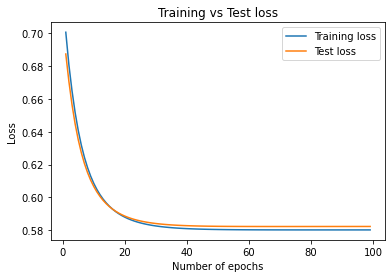

In [32]:
# plotting the test vs train loss curve
plt.plot(range(1, len(train_loss)+1), train_loss, label = "Training loss")
plt.plot(range(1, len(test_loss)+1), test_loss, label = "Test loss")
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title("Training vs Test loss")
plt.legend()
plt.show()

### *Model is underfitting, so it can be improved by making the model more complex*